<a href="https://colab.research.google.com/github/SREENIVASAN-KV/play_store_app_review/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
path1='/content/drive/MyDrive/alma better/data/python_capestone_project/Copy of User Reviews.csv'
review=pd.read_csv(path1)

In [23]:
path2='/content/drive/MyDrive/alma better/data/python_capestone_project/Copy of Play Store Data.csv'
play_store_data=pd.read_csv(path2)

In [24]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [25]:
play_store_data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [26]:
#cleaning the data
play_store_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [60]:
play_store_data.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,last updated quarter
count,10357,10357,10357.000000,10357,10357,1.035700e+04,10356,10357.000000,10357,10357,10357,10357,10357,10357
unique,9659,33,NaN,6001,461,NaN,2,NaN,6,119,1377,2831,33,32
top,ROBLOX,FAMILY,NaN,0,Varies with device,NaN,Free,NaN,Everyone,Tools,2018-08-03 00:00:00,Varies with device,4.1 and up,2018 Q3
freq,9,1943,NaN,593,1526,NaN,9591,NaN,8382,842,298,1310,2381,3810
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010-05-21 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-08 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,4.175447,NaN,NaN,1.415776e+07,NaN,1.030800,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.484988,NaN,NaN,8.023955e+07,NaN,16.278625,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,0.000000e+00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.100000,NaN,NaN,1.000000e+03,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# filling null values with top or average values from that column
# the average value for rating is 4.1 
# the top value for content rating is 'everyone',
# the top value for current version is 'Varies with device'
# the top value for android version is '4.1 and up'
play_store_data['Rating'].fillna(4.1, inplace=True)
play_store_data['Content Rating'].fillna('Everyone', inplace=True)
play_store_data['Current Ver'].fillna('Varies with device', inplace=True)
play_store_data['Android Ver'].fillna('4.1 and up' , inplace=True)


In [62]:
#checking for inapropriate data
play_store_data['Rating'].value_counts()

4.1    2122
4.4    1032
4.3    1016
4.5     977
4.2     888
4.6     768
4.0     539
4.7     484
3.9     372
3.8     293
5.0     271
3.7     231
4.8     228
3.6     169
3.5     157
3.4     127
3.3     101
4.9      87
3.0      82
3.1      69
3.2      64
2.9      45
2.8      40
2.6      24
2.7      23
2.3      20
2.5      20
2.4      19
1.0      16
2.2      14
2.0      12
1.9      12
1.7       8
2.1       8
1.8       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [63]:
# the maximum value for rating is 5, 19 is an inapropriate value
play_store_data[play_store_data.Rating ==19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,last updated quarter


In [64]:
# droping row 10472
play_store_data.drop([10472],inplace=True)

KeyError: ignored

In [65]:
#droping duplicates
play_store_data=play_store_data.drop_duplicates()

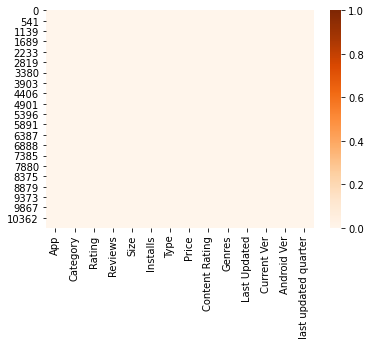

In [66]:
# final data
sns.heatmap(play_store_data.isnull(),cmap="Oranges")

**Analysis over single columns**

In [67]:
#the top 30 Genres

In [68]:
top_genres=play_store_data['Genres'].value_counts().head(30)

In [69]:
top_genres

Tools                      842
Entertainment              588
Education                  527
Business                   427
Medical                    408
Productivity               407
Personalization            388
Lifestyle                  372
Communication              366
Sports                     364
Finance                    360
Action                     356
Photography                322
Health & Fitness           306
Social                     280
News & Magazines           264
Travel & Local             236
Books & Reference          230
Shopping                   224
Arcade                     218
Simulation                 199
Dating                     196
Casual                     191
Video Players & Editors    173
Maps & Navigation          137
Puzzle                     136
Food & Drink               124
Role Playing               109
Strategy                   105
Racing                      98
Name: Genres, dtype: int64

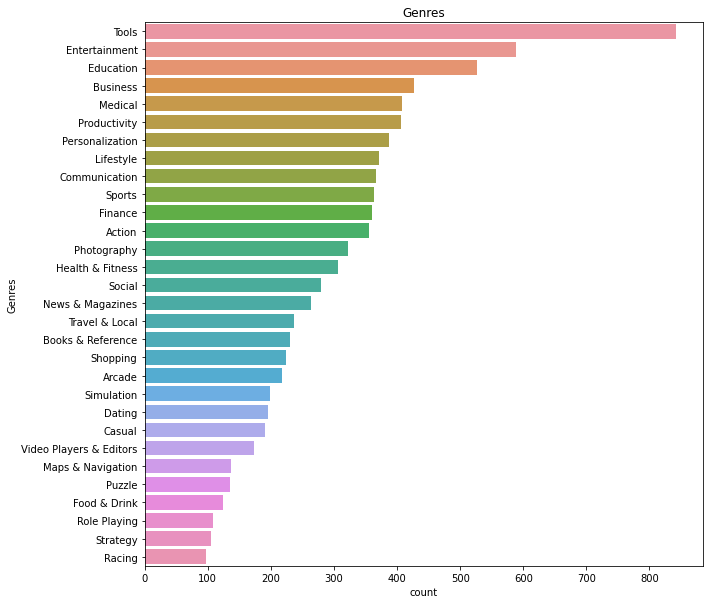

In [70]:
# visualizing the availability of apps in the market for differnet genres
plt.figure(figsize = (10, 10))
sns.countplot(y='Genres',data=play_store_data,order=top_genres.index)
plt.title('Genres')
plt.show()


In [39]:
# finding out how often the apps updates
# adding another column to the dataframe showing the year and the quarter in which the app last updated
from datetime import datetime
from datetime import date
play_store_data['Last Updated']=pd.to_datetime(play_store_data['Last Updated'])
def updated_quarter(date):
  if date.month in range(1,4):
     return str(date.year)+' Q1'
  if date.month in range(4,7):
    return str(date.year)+' Q2'
  if date.month in range(7,10):
    return str(date.year)+' Q3'
  if date.month in range(10,13):
    return str(date.year)+' Q4'
play_store_data['last updated quarter']=play_store_data['Last Updated'].apply(updated_quarter)

In [40]:
last_updation = play_store_data['last updated quarter'].value_counts()
last_updation

2018 Q3    3810
2018 Q2    2106
2018 Q1    1018
2017 Q4     683
2017 Q3     459
2017 Q1     356
2017 Q2     328
2016 Q4     263
2016 Q3     211
2016 Q2     176
2016 Q1     139
2015 Q3     133
2015 Q4     128
2015 Q2     103
2015 Q1      90
2014 Q4      66
2014 Q3      55
2013 Q3      46
2014 Q1      43
2014 Q2      40
2013 Q4      32
2013 Q2      21
2013 Q1       9
2012 Q3       7
2011 Q2       7
2012 Q4       7
2012 Q2       6
2012 Q1       6
2011 Q3       3
2011 Q4       3
2011 Q1       2
2010 Q2       1
Name: last updated quarter, dtype: int64

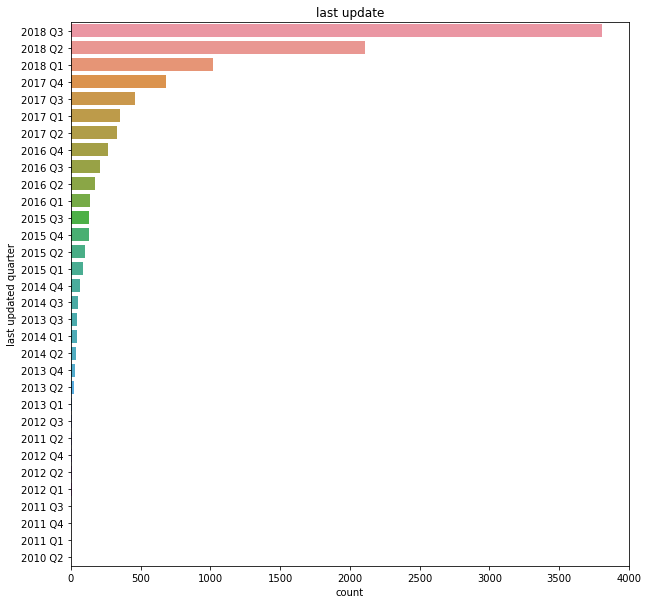

In [41]:
# visualization 
plt.figure(figsize = (10, 10))
sns.countplot(y='last updated quarter',data=play_store_data,order=last_updation.index)
plt.title('last update')
plt.show()

In [42]:
# understanding the available app versions
top_30_app_versions=play_store_data['Current Ver'].value_counts().head(30)

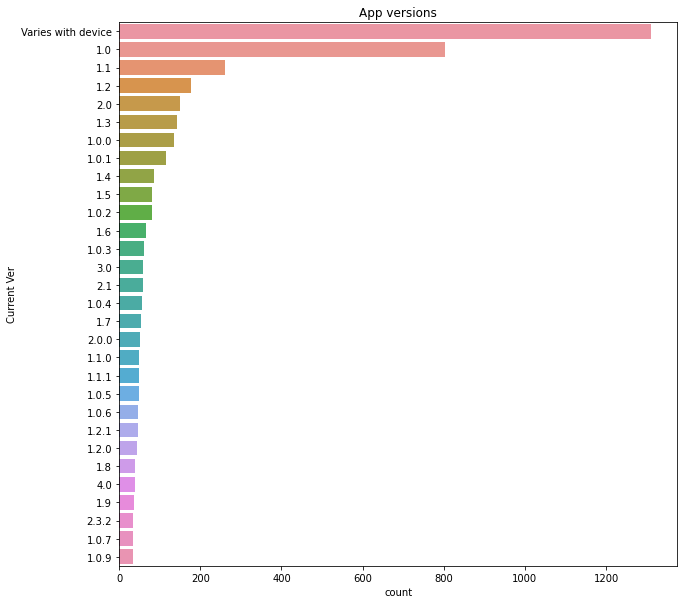

In [ ]:
# visualaization of the most common app versions
plt.figure(figsize = (10, 10))
sns.countplot(y='Current Ver',data=play_store_data,order=top_30_app_versions.index)
plt.title('App versions')
plt.show()

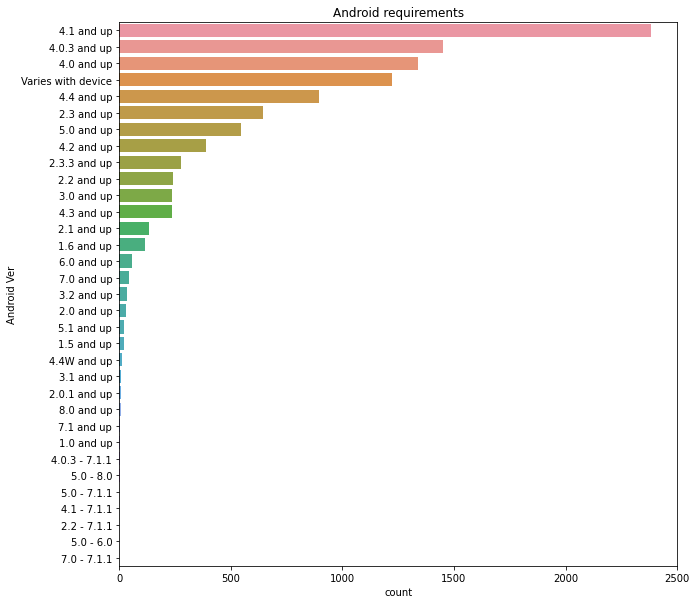

In [43]:
# most prefered android versions by developers
android_versions=play_store_data['Android Ver'].value_counts()
plt.figure(figsize = (10, 10))
sns.countplot(y='Android Ver',data=play_store_data,order=android_versions.index)
plt.title('Android requirements')
plt.show()


**android version vs installs**

In [44]:
#looking for minimum android requirments for a popular app
play_store_data['Installs'] = play_store_data['Installs'].str.replace('+','')
play_store_data['Installs'] = play_store_data['Installs'].str.replace(',','')
play_store_data['Installs'] = play_store_data['Installs'].astype(int)
version_vs_users=play_store_data.groupby('Android Ver')['Installs'].sum()

Text(0.5, 1.0, 'Android version vs Installs')

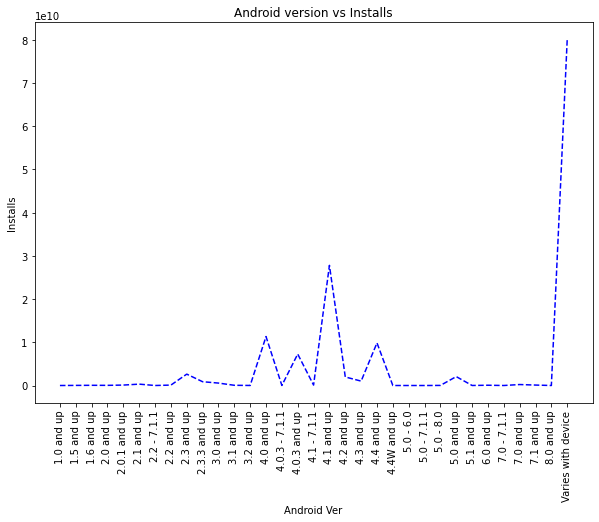

In [45]:
plt.figure(figsize=(10,7))
plt.plot(version_vs_users,'r--',color='b')
plt.xticks(rotation=90)
plt.xlabel('Android Ver')
plt.ylabel('Installs')
plt.title('Android version vs Installs')

In [49]:
category_vs_genres=play_store_data.groupby('Category')['Genres'].sum()
category_vs_genres.size

33

In [ ]:
category_vs_genres=play_store_data.groupby('Category')['Genres'].sum()
category_vs_genres.size

33

In [56]:
play_store_data['Price'] = play_store_data['Price'].str.replace('$','')
play_store_data['Price'] =play_store_data['Price'].astype(float)
play_store_data['Price'].unique().sort_values()

AttributeError: ignored

In [53]:
play_store_data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,last updated quarter
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018 Q1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018 Q1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018 Q3
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018 Q2
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018 Q2
